In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [2]:
tf.__version__

'2.0.0'

In [3]:
dataset = pd.read_excel('Folds.xlsx')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [5]:
#Building ANN

In [6]:
ann = tf.keras.models.Sequential()

In [7]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [8]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [9]:
ann.add(tf.keras.layers.Dense(units=1))

In [10]:
#Training ANN

In [11]:
ann.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [12]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Train on 7654 samples
Epoch 1/100
7654/7654 [==============================] - 1s 92us/sample - loss: 20689.1293
Epoch 2/100
7654/7654 [==============================] - 0s 29us/sample - loss: 132.3034
Epoch 3/100
7654/7654 [==============================] - 0s 25us/sample - loss: 128.4874
Epoch 4/100
7654/7654 [==============================] - 0s 25us/sample - loss: 123.8657
Epoch 5/100
7654/7654 [==============================] - 0s 26us/sample - loss: 118.4157
Epoch 6/100
7654/7654 [==============================] - 0s 25us/sample - loss: 112.3263
Epoch 7/100
7654/7654 [==============================] - 0s 25us/sample - loss: 106.4806
Epoch 8/100
7654/7654 [==============================] - 0s 27us/sample - loss: 99.9713
Epoch 9/100
7654/7654 [==============================] - 0s 26us/sample - loss: 93.7176
Epoch 10/100
7654/7654 [==============================] - 0s 25us/sample - loss: 87.5397
Epoch 11/100
7654/7654 [==============================] - 0s 25us/sample - loss: 81.3154

In [13]:
y_pred = ann.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[432.65 431.23]
 [461.65 460.01]
 [468.01 461.14]
 ...
 [474.14 473.26]
 [439.58 438.  ]
 [459.57 463.28]]


In [49]:
P=y_pred.reshape(len(y_pred),1)
Q=y_test.reshape(len(y_test),1)

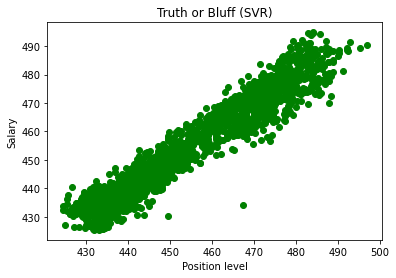

In [50]:
import matplotlib.pyplot as plt
plt.scatter(P,Q, color = 'green')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [69]:
a=[]
for i in range (len(P)):
    #print(P[i]-Q[i])
    a.append(float(P[i]-Q[i]))
print("MAX = ",max(a))
print("MIN = ",min(a))
print("Average = ",sum(a)/len(a))

MAX =  33.33407104492187
MIN =  -13.71651367187502
Average =  0.3686009032948012
